In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftn, fftfreq, fftshift

def compute_energy_spectrum(batch_vel, spacing=(3.14, 1.57), bins=100):
    """
    Compute averaged isotropic energy spectrum from a batch of 3D velocity fields.

    Parameters:
    - batch_vel: numpy array of shape (B, 3, X, Y, Z)
    - spacing: tuple of voxel sizes (dx, dz)
    - bins: number of bins in radial spectrum
    """
    B, C, Nx, Ny, Nz = batch_vel.shape
    Lx, Lz = spacing
    dx, dz = Lx / Nx, Lz / Nz 

    # Create frequency grid
    kx = fftfreq(Nx, d=dx)
    kz = fftfreq(Nz, d=dz)
    KX, KZ = np.meshgrid(kx, kz, indexing='ij')
    k_mag = np.sqrt(KX**2 + KZ**2)

    # Prepare energy accumulation
    E_total = np.zeros_like(k_mag)

    for c in range(C):
        for y in range(Y):
            pass
            u = batch_vel[b, c]
            u_hat = fftn(u)
            E = np.abs(u_hat)**2
            E_total += E

    # Average over components and batches
    E_avg = E_total / (B * C)

    # Bin energy in spherical shells
    k_flat = k_mag.flatten()
    E_flat = fftshift(E_avg).flatten()
    k_max = np.max(k_mag)
    k_bins = np.linspace(0, k_max, bins + 1)
    k_bin_centers = 0.5 * (k_bins[1:] + k_bins[:-1])

    E_k = np.zeros(bins)
    counts = np.zeros(bins)

    bin_indices = np.digitize(k_flat, k_bins) - 1
    for i in range(bins):
        mask = bin_indices == i
        E_k[i] = E_flat[mask].sum()
        counts[i] = mask.sum()

    E_k_avg = np.divide(E_k, counts, where=counts > 0)

    return k_bin_centers, E_k_avg

# === Example usage ===


In [2]:
import numpy as np
from space_exploration.beans.dataset_bean import Dataset
from space_exploration.dataset.transforms.AllTransforms import TransformationReferences
dataset_name = "re200-sr1etot"
dataset = Dataset.get_dataset_or_fail(dataset_name)
# ds = dataset.get_training_dataset(64, TransformationReferences.DEFAULT_UNCHANGED.transformation, TransformationReferences.DEFAULT_UNCHANGED.transformation, size=1000)
ds = dataset.get_training_dataset(64, TransformationReferences.COMPONENT_NORMALIZE.transformation, TransformationReferences.Y_ALONG_COMPONENT_NORMALIZE.transformation, size=10)
xs = np.array([x.numpy() for x, y in ds])
ys = np.array([y.numpy() for x, y in ds])


Loading std & mean of dataset re200-sr1etot
Loading stds & means of dataset re200-sr1etot
⌛ Initializing Dataset...
X...
[########################################] | 100% Completed | 103.28 ms
Y...
[########################################] | 100% Completed | 826.46 ms


In [16]:



def compute_comp(comp):
    vel = ys[:, comp:comp + 1, ...]
    # Optional: voxel spacing (dx, dy, dz) in physical units
    spacing = (3.14, 1.0, 1.57)
    
    # Compute spectrum
    k, E_k = compute_energy_spectrum(vel, spacing)
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.loglog(k, E_k + 1e-12)  # Add epsilon to avoid log(0)
    plt.xlabel("Wavenumber k")
    plt.ylabel("E(k)")
    plt.title("Averaged Isotropic Energy Spectrum")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Suggest DoG σ based on energy peaks
    from scipy.signal import argrelmax
    
    # Find local maxima in E(k) to suggest active scales
    peaks = argrelmax(E_k)[0]
    print("📌 Dominant wavenumbers (peaks):", k[peaks])
    
    # Suggest σ = 1 / k
    suggested_sigmas = 1 / k[peaks]
    print("📐 Suggested physical DoG σ (approx.):", suggested_sigmas)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftn, fftfreq, fftshift

In [3]:
batch_vel = ys[:10]
spacing = (3.14, 1.57)
bins = 100

In [4]:
B, C, Nx, Ny, Nz = batch_vel.shape
Lx, Lz = spacing
dx, dz = Lx / Nx, Lz / Nz 

In [7]:
kx = fftfreq(Nx, d=dx)
kz = fftfreq(Nz, d=dz)

In [21]:
KX, KZ = np.meshgrid(kx, kz, indexing='ij')

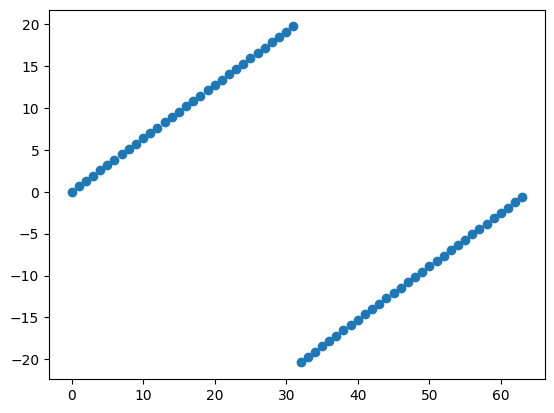

In [43]:
plt.scatter(np.linspace(0, 63, 64), kz)

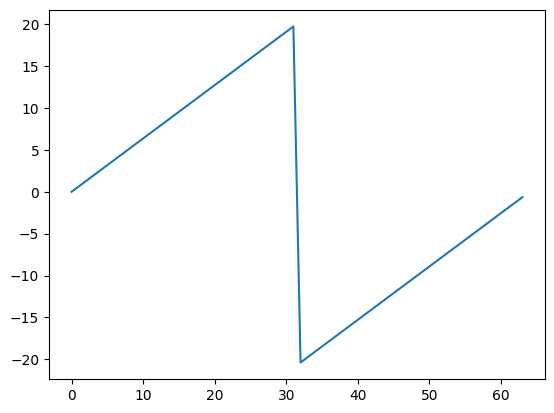

In [55]:
plt.plot(KZ[0])  # == KX[:, 0]

In [44]:
k_mag = np.sqrt(KX**2 + KZ**2)

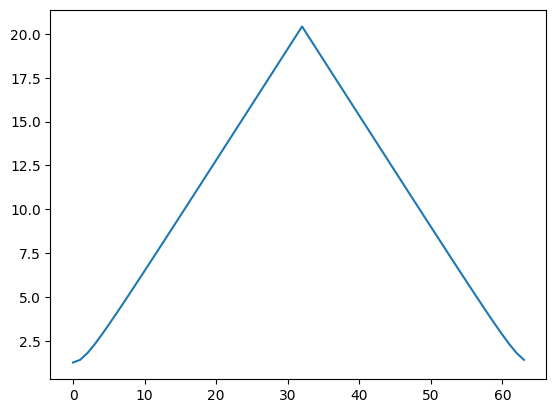

In [68]:
plt.plot(k_mag[60])

In [35]:



# Create frequency grid




# Prepare energy accumulation
E_total = np.zeros_like(k_mag)

for b in range(B):
    for c in range(C):
        u = batch_vel[b, c]
        u_hat = fftn(u)
        E = np.abs(u_hat)**2
        E_total += E

# Average over components and batches
E_avg = E_total / (B * C)

# Bin energy in spherical shells
k_flat = k_mag.flatten()
E_flat = fftshift(E_avg).flatten()
k_max = np.max(k_mag)
k_bins = np.linspace(0, k_max, bins + 1)
k_bin_centers = 0.5 * (k_bins[1:] + k_bins[:-1])

E_k = np.zeros(bins)
counts = np.zeros(bins)

bin_indices = np.digitize(k_flat, k_bins) - 1
for i in range(bins):
    mask = bin_indices == i
    E_k[i] = E_flat[mask].sum()
    counts[i] = mask.sum()

E_k_avg = np.divide(E_k, counts, where=counts > 0)


ValueError: non-broadcastable output operand with shape (64,64) doesn't match the broadcast shape (64,64,64)

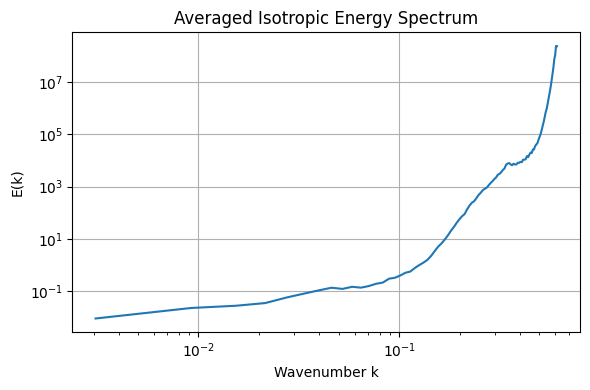

📌 Dominant wavenumbers (peaks): [0.04603681 0.05831329 0.35294884 0.37136356 0.38977829 0.40205477
 0.41433125 0.43274597 0.45116069 0.60461671]
📐 Suggested physical DoG σ (approx.): [21.72175049 17.14875039  2.8332718   2.69277899  2.56556108  2.48722334
  2.41352783  2.31082452  2.21650515  1.65394039]


In [18]:
compute_comp(1)

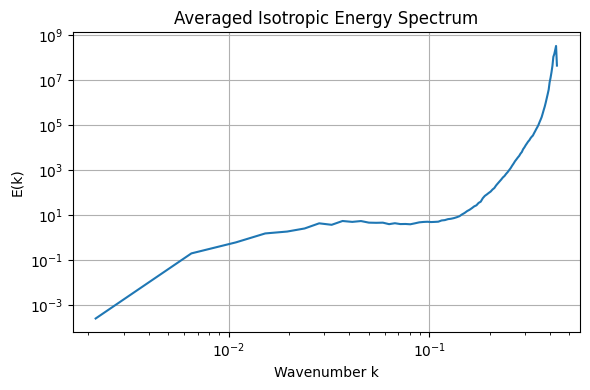

📌 Dominant wavenumbers (peaks): [0.02827911 0.03698037 0.04568164 0.05873353 0.0674348  0.07613606
 0.09788922 0.42853726]
📐 Suggested physical DoG σ (approx.): [35.36179401 27.04137189 21.89063439 17.02604897 14.82913942 13.13438063
 10.21562938  2.3335194 ]


In [15]:
compute_comp(2)